# Vizzes

* [umap docs](https://umap-learn.readthedocs.io/en/latest/)

In [1]:
import umap
import umap.plot
from top2vec import Top2Vec

In [2]:
model = Top2Vec.load("./../models/pq-model")

In [3]:
umap_args = {
    "n_neighbors": 15,
    "n_components": 2, # plotting is currently only implemented for 2d embeddings
    "metric": "cosine"
}
umap_model = umap.UMAP(**umap_args).fit(model._get_document_vectors(norm=False))

## Matplotlib - the simplest figure

In [4]:
import matplotlib.pyplot as plt

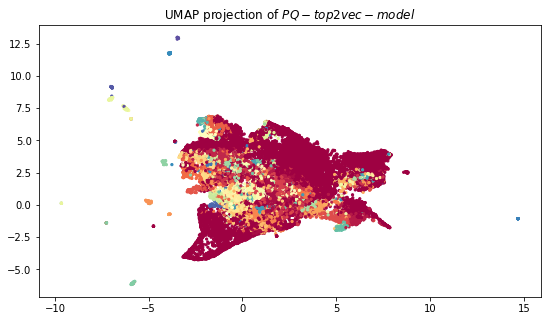

In [5]:
plt.figure(figsize=(9, 5))
plt.scatter(
    umap_model.embedding_[:, 0], umap_model.embedding_[:, 1], 
    c=model.doc_top, 
    cmap="Spectral", 
    s=5
)
plt.title("UMAP projection of $PQ-top2vec-model$")
plt.savefig(
    "./../reports/figures/matplotlib-simplest-form.png", 
    dpi=300, 
    bbox_inches="tight",
    pad_inches=0.3,
)
plt.show()

Colors represent the topic each document's been assigned to (47 topics in total)  

In [6]:
# how many documents each topic has?
model.topic_sizes

0     14436
1      1244
2       770
3       703
4       650
5       633
6       613
7       606
8       366
9       360
10      349
11      348
12      340
13      324
14      285
15      271
16      261
17      257
18      241
19      240
20      222
21      211
22      195
23      177
24      173
25      160
26      159
27      158
28      146
29      144
30      133
31      126
32      124
33      116
34      107
35      104
36      104
37      103
38       91
39       81
40       80
41       70
42       60
43       57
44       50
45       41
46       36
dtype: int64

## UMAP plotting

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


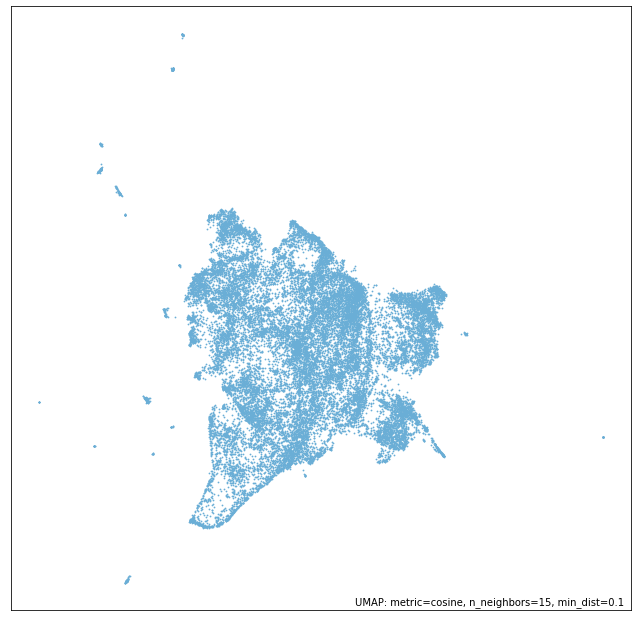

In [7]:
umap.plot.points(umap_model)
plt.savefig(
    "./../reports/figures/umap-points.png", 
    dpi=300, 
    bbox_inches="tight",
    pad_inches=0.3,
)

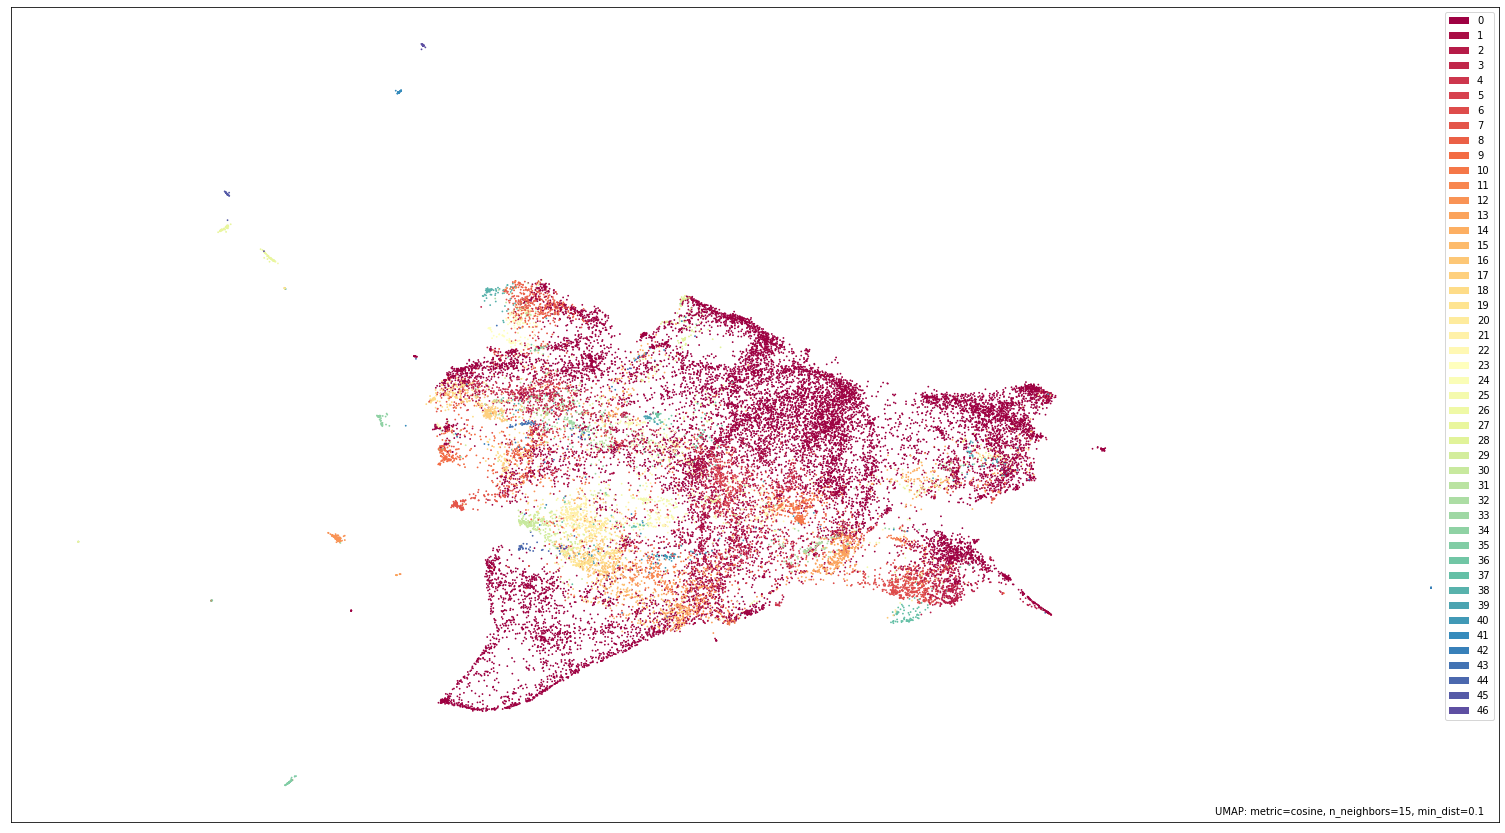

In [8]:
# the same but with labels
umap.plot.points(umap_model, labels=model.doc_top, height=1080, width=1920)
plt.savefig(
    "./../reports/figures/umap-points-labeled.png", 
    dpi=300, 
    bbox_inches="tight",
    pad_inches=0.3,
)

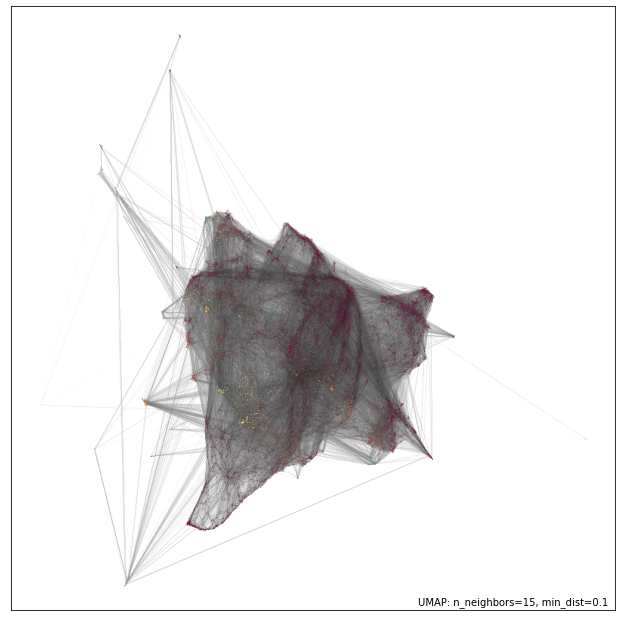

In [9]:
umap.plot.connectivity(
    umap_model, 
    labels=model.doc_top, 
    show_points=True,  
)
plt.savefig(
    "./../reports/figures/umap-connectivity.png", 
    dpi=300, 
    bbox_inches="tight",
    pad_inches=0.3,
)

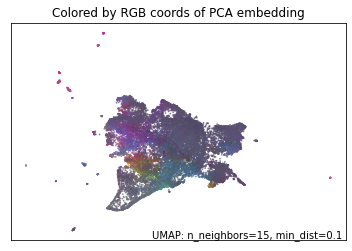

In [10]:
umap.plot.diagnostic(umap_model, diagnostic_type="pca")
plt.savefig(
    "./../reports/figures/umap-diagnostic-PCA.png", 
    dpi=300, 
    bbox_inches="tight",
    pad_inches=0.3,
)

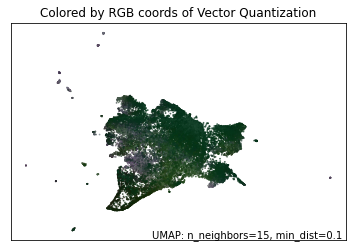

In [11]:
umap.plot.diagnostic(umap_model, diagnostic_type="vq")
plt.savefig(
    "./../reports/figures/umap-diagnostic-VQ.png", 
    dpi=300, 
    bbox_inches="tight",
    pad_inches=0.3,
)

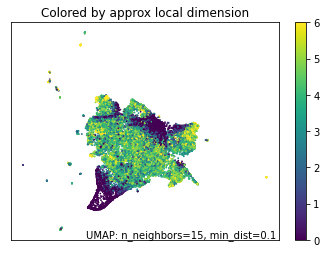

In [12]:
umap.plot.diagnostic(umap_model, diagnostic_type="local_dim")
plt.savefig(
    "./../reports/figures/umap-diagnostic-local-dim.png", 
    dpi=300, 
    bbox_inches="tight",
    pad_inches=0.3,
)